# **Project Topic**

This is a Supervised Machine Learning problem and the task is classification. The goal of this project is to evaluate several machine learning models such as KNN,Decision Trees, Ensemble Boosting alrogirthm (AdaBoost), and finally a Multi-layer Perceptron algorithm to predict whether a person has Diabetes based on a number of lifestyle features.

[Public GitHub Repository](https://github.com/tannerdrake-dev/CSCA_5622_Final_Project)

[Youtube Video Summary](https://youtu.be/vsehUZc8dDQ)

## **Data Information**

##### Source

The source of this data was obtained via [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators).    
[Relevant CDC Report](https://www.cdc.gov/mmwr/volumes/66/wr/mm6643a2.htm)

##### Description and Details

This data is the result of a study funded the United States Centers for Disease Control and Prevention (CDC). The data contains 21 features and approximately 253,680 rows. It is tabular data inside a single table.

The data includes an ID (unique integer) and our target Diabetes_binary in addition to the features detailed below.

| **Feature** | **Type** |
| :---------: | :------: |
| HighBP      | Binary   |   
| HighChol | Binary |
| CholCheck | Binary |
| BMI | Integer |
| Smoker | Binary |
| Stroke | Binary |
| HeartDiseaseorAttack | Binary |
| PhysActivity | Binary |
| Fruits | Binary |
| Veggies | Binary |
| HvyAlcoholConsump | Binary |
| AnyHealthcare | Binary |
| NoDocbcCost | Binary    
| GenHlth | Integer |
| MentHlth | Integer |
| PhysHlth | Integer |
| DiffWalk | Binary |
| Sex | Binary |
| Age | Integer |
| Education | Integer |
| Income | Integer |


## **Data Cleaning**

First install necessary packages.

In [ ]:
%pip install ucimlrepo
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Next import necessary libraries and fetch the dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets

print(X.info())

# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape of the datasets
print("Shape of the datasets:")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# flatten to 1d array expected by sklearn
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

According to the above output of pandas info on the feature dataframe and the data source itself, the data is already quite clean. There are no null values in this dataset and each feature is already an appropriate datatype. However we do need to flatten both y_train and y_test to conform to the 1d array expected by sklearn models.

<Axes: >

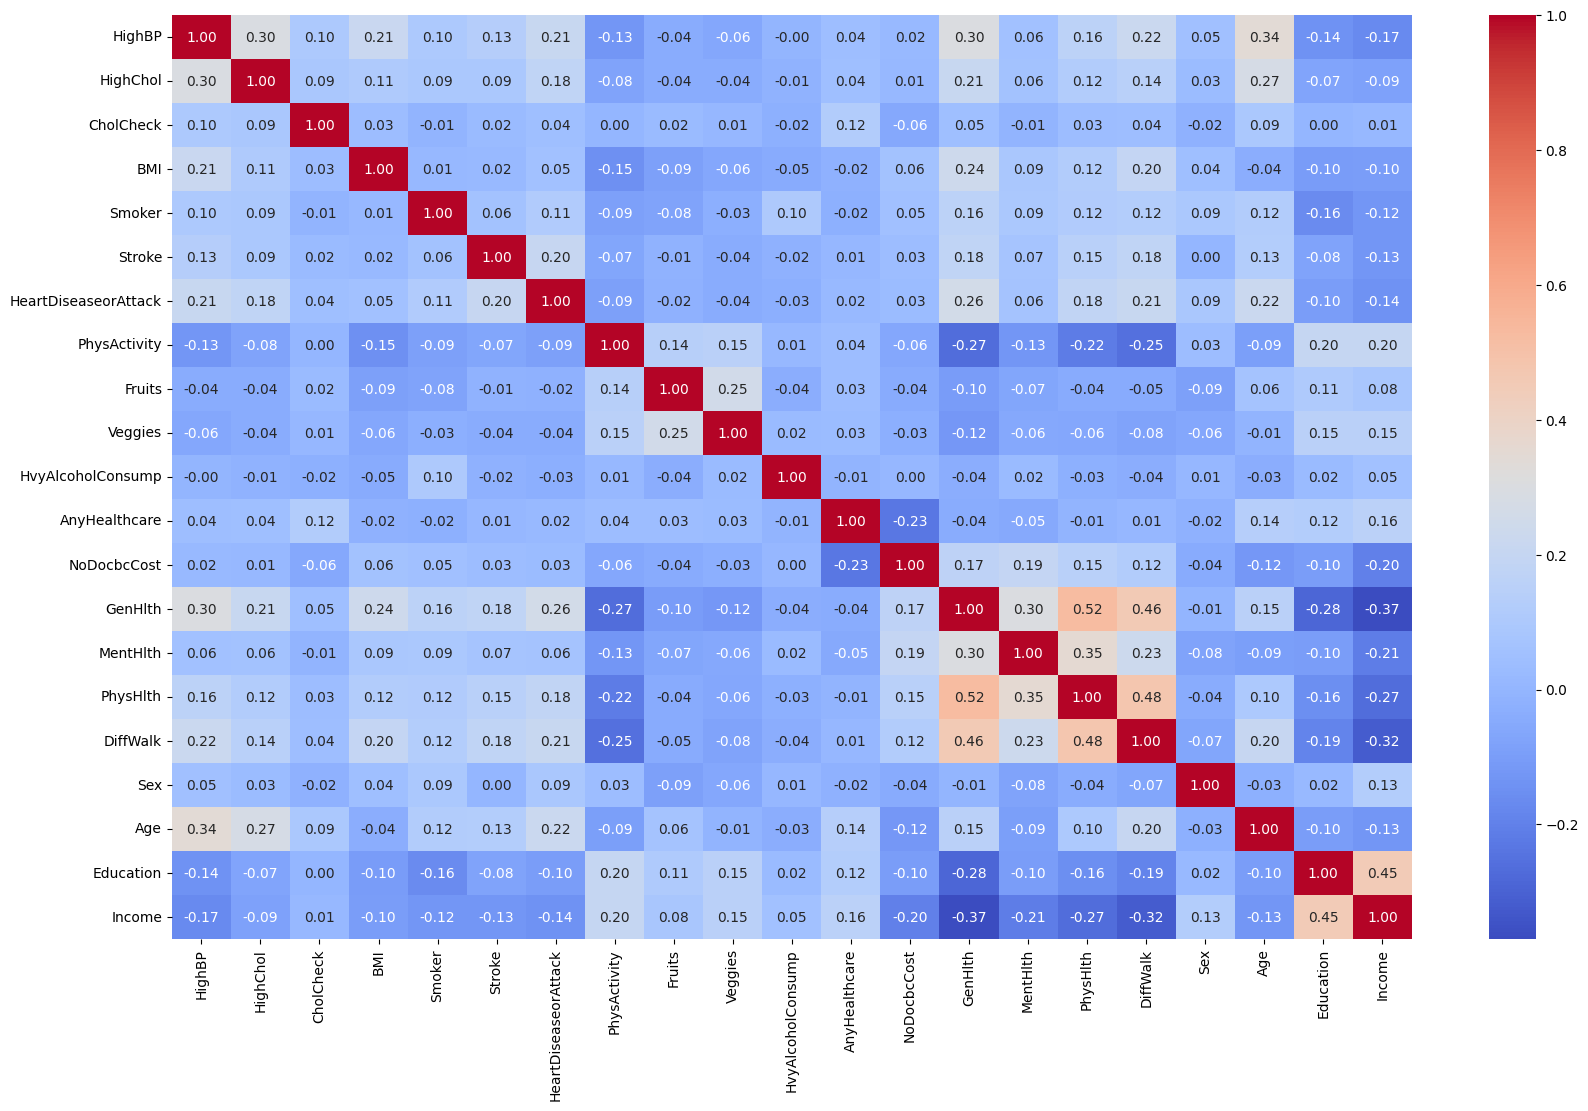

In [2]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)



From the correlation heatmap we can see that only two features approach some level of collinearity, GenHlth and PhysHlth but the value is not so large that anything needs to be addressed.

## Machine Learning Models

### KNN

In [4]:
# create a KNN classifier with GridSearchCV
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 7, 11, 15, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
print("Best parameters for KNN: ", grid_search_knn.best_params_)
print("Best score for KNN: ", grid_search_knn.best_score_)

grid_search_knn_best_score = grid_search_knn.best_estimator_.score(X_test, y_test)
print("Test score for KNN: ", grid_search_knn_best_score)

Best parameters for KNN:  {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
Best score for KNN:  0.8609517852480216
Test score for KNN:  0.8620703248186692


### Decision Tree

In [5]:
# create a Decision Tree classifier with GridSearchCV
dt = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 15, 20, 50],
    'min_samples_split': [2, 5, 10, 25],
    'min_samples_leaf': [1, 2, 4, 8]
}
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
print("Best parameters for Decision Tree: ", grid_search_dt.best_params_)
print("Best score for Decision Tree: ", grid_search_dt.best_score_)
grid_search_dt_best_score = grid_search_dt.best_estimator_.score(X_test, y_test)
print("Test score for Decision Tree: ", grid_search_dt_best_score)

Best parameters for Decision Tree:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree:  0.864287683122938
Test score for Decision Tree:  0.8661305581835383


## Ensemble/AdaBoost

In [6]:
# create an AdaBoost classifier with GridSearchCV
ab = AdaBoostClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}
grid_search_ab = GridSearchCV(ab, param_grid, cv=5, scoring='accuracy')
grid_search_ab.fit(X_train, y_train)
print("Best parameters for AdaBoost: ", grid_search_ab.best_params_)
print("Best score for AdaBoost: ", grid_search_ab.best_score_)
grid_search_ab_best_score = grid_search_ab.best_estimator_.score(X_test, y_test)
print("Test score for AdaBoost: ", grid_search_ab_best_score)

Best parameters for AdaBoost:  {'learning_rate': 1.0, 'n_estimators': 200}
Best score for AdaBoost:  0.8642433349183591
Test score for AdaBoost:  0.8667809839167455


## Multi-layer Perceptron

In [7]:
# create an MLP classifier with GridSearchCV
mlp = MLPClassifier(max_iter=1000)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive']
}
grid_search_mlp = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train, y_train)
print("Best parameters for MLP: ", grid_search_mlp.best_params_)
print("Best score for MLP: ", grid_search_mlp.best_score_)
grid_search_mlp_best_score = grid_search_mlp.best_estimator_.score(X_test, y_test)
print("Test score for MLP: ", grid_search_mlp_best_score)

Best parameters for MLP:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best score for MLP:  0.8663720026055769
Test score for MLP:  0.8683380637023022


Summary of results

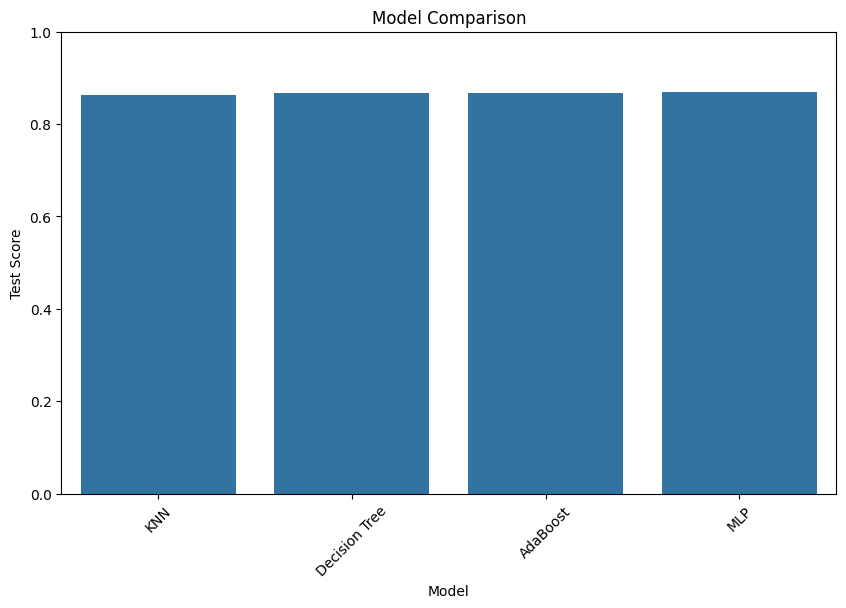

In [8]:
# plot the results
results = {
    'KNN': grid_search_knn_best_score,
    'Decision Tree': grid_search_dt_best_score,
    'AdaBoost': grid_search_ab_best_score,
    'MLP': grid_search_mlp_best_score
}
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Test Score'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Score', data=results_df)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Test Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

### Conclusion and Reflections

**What I Learned:**
This project deepened my understanding of the supervised learning pipeline, from data preprocessing to model evaluation. I gained hands-on experience comparing various regression models and fine-tuning hyperparameters to optimize performance.

**Model Performance Insight:**
Surprisingly, all the models performed **similarly well** in terms of accuracy and other evaluation metrics. KNN, Decision Trees, AdaBoost, and MLP all achieved comparable results. This suggests that the available features are **strong indicators** of diabetes, and even simpler models were able to effectively capture the signal.

**What Didn't Work as Expected:**
While I expected more dramatic performance gains from ensemble methods, the marginal improvements suggest diminishing returns beyond a certain point — possibly due to the dataset's structure or the already high predictive signal in the features.

**Future Improvements:**
- Explore additional features or external datasets.
- Apply advanced techniques like XGBoost or more complex neural networks.

Overall, the project was successful in predicting diabetes based on lifestyle and socioeconomic factors.
